
Comparación Real vs Predicho (2024, con MEDIANA):
    Month  Real_CO  Year  Pred_CO
0       1      0.3  2024    0.275
1       2      0.3  2024    0.300
2       3      0.3  2024    0.350
3       4      0.3  2024    0.300
4       5      0.3  2024    0.100
5       6      0.3  2024    0.150
6       7      0.2  2024    0.200
7       8      0.3  2024    0.300
8       9      0.3  2024    0.350
9      10      0.3  2024    0.250
10     11      0.3  2024    0.300
11     12      0.4  2024    0.350


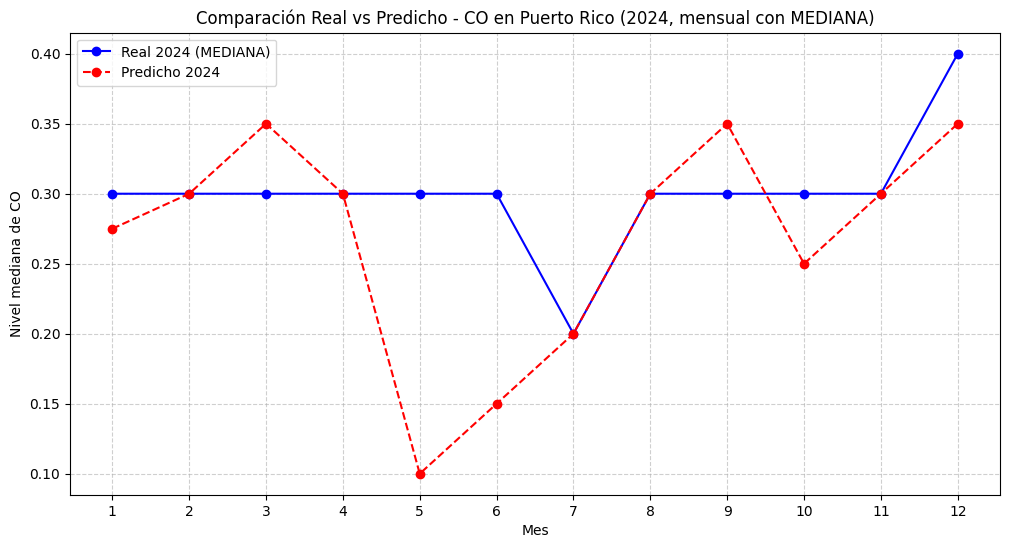

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# =====================
# 1. Cargar datasets
# =====================
df_2022 = pd.read_csv("2022.csv")
df_2023 = pd.read_csv("2023.csv")
df_2024 = pd.read_csv("2024.csv")

# Agregar columna Year
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# =====================
# 2. Unir datos de entrenamiento
# =====================
df_total = pd.concat([df_2022, df_2023], ignore_index=True)

# Filtrar Puerto Rico
df_pr = df_total[df_total["State"] == "Puerto Rico"].copy()
df_2024_pr = df_2024[df_2024["State"] == "Puerto Rico"].copy()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# =====================
# 1. Cargar datasets
# =====================
df_2022 = pd.read_csv("2022.csv")
df_2023 = pd.read_csv("2023.csv")
df_2024 = pd.read_csv("2024.csv")

# Agregar columna Year
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# =====================
# 2. Unir datos de entrenamiento
# =====================
df_total = pd.concat([df_2022, df_2023], ignore_index=True)

# Filtrar Puerto Rico
df_pr = df_total[df_total["State"] == "Puerto Rico"].copy()
df_2024_pr = df_2024[df_2024["State"] == "Puerto Rico"].copy()

# =====================
# 3. Procesar fechas
# =====================
df_pr["Date"] = pd.to_datetime(df_pr["Date"])
df_pr["Month"] = df_pr["Date"].dt.month

df_2024_pr["Date"] = pd.to_datetime(df_2024_pr["Date"])
df_2024_pr["Month"] = df_2024_pr["Date"].dt.month

# =====================
# 4. Calcular MEDIANA mensual de 2022-2023
# =====================
monthly_median = (
    df_pr.groupby(["Year", "Month"])["Daily Max 8-hour CO Concentration"]
    .median()   # aquí usamos mediana en vez de moda
    .reset_index()
)

# Crear variables dummy para año y mes
monthly_median = pd.get_dummies(monthly_median, columns=["Year", "Month"], prefix=["Year", "Month"])

# Definir X e y
X = monthly_median.drop(columns=["Daily Max 8-hour CO Concentration"])
y = monthly_median["Daily Max 8-hour CO Concentration"]

# =====================
# 5. Entrenar modelo
# =====================
model = LinearRegression()
model.fit(X, y)

# =====================
# 6. Dataset dummy para predicciones 2024
# =====================
months_2024 = pd.DataFrame({
    "Year_2022": [0]*12,
    "Year_2023": [0]*12,
    "Month_1": [1,0,0,0,0,0,0,0,0,0,0,0],
    "Month_2": [0,1,0,0,0,0,0,0,0,0,0,0],
    "Month_3": [0,0,1,0,0,0,0,0,0,0,0,0],
    "Month_4": [0,0,0,1,0,0,0,0,0,0,0,0],
    "Month_5": [0,0,0,0,1,0,0,0,0,0,0,0],
    "Month_6": [0,0,0,0,0,1,0,0,0,0,0,0],
    "Month_7": [0,0,0,0,0,0,1,0,0,0,0,0],
    "Month_8": [0,0,0,0,0,0,0,1,0,0,0,0],
    "Month_9": [0,0,0,0,0,0,0,0,1,0,0,0],
    "Month_10":[0,0,0,0,0,0,0,0,0,1,0,0],
    "Month_11":[0,0,0,0,0,0,0,0,0,0,1,0],
    "Month_12":[0,0,0,0,0,0,0,0,0,0,0,1],
})

# Predicciones para 2024
pred_2024 = model.predict(months_2024)

# =====================
# 7. Dataset real 2024 (mediana por mes)
# =====================
real_2024 = (
    df_2024_pr.groupby("Month")["Daily Max 8-hour CO Concentration"]
    .median()
    .reset_index()
)
real_2024["Year"] = 2024
real_2024.rename(columns={"Daily Max 8-hour CO Concentration": "Real_CO"}, inplace=True)

# Unir con predicciones
comp_2024 = real_2024.copy()
comp_2024["Pred_CO"] = pred_2024

print("\nComparación Real vs Predicho (2024, con MEDIANA):")
print(comp_2024)

# =====================
# 8. Visualización
# =====================
plt.figure(figsize=(12,6))
plt.plot(comp_2024["Month"], comp_2024["Real_CO"], "bo-", label="Real 2024 (MEDIANA)")
plt.plot(comp_2024["Month"], comp_2024["Pred_CO"], "ro--", label="Predicho 2024")
plt.xticks(np.arange(1,13))
plt.xlabel("Mes")
plt.ylabel("Nivel mediana de CO")
plt.title("Comparación Real vs Predicho - CO en Puerto Rico (2024, mensual con MEDIANA)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



📊 Métricas de error (2024, mensual con MEDIANA):
Error Absoluto Medio (MAE): 0.0479
Raíz del Error Cuadrático Medio (RMSE): 0.0781
Coeficiente de Determinación (R²): -2.6563


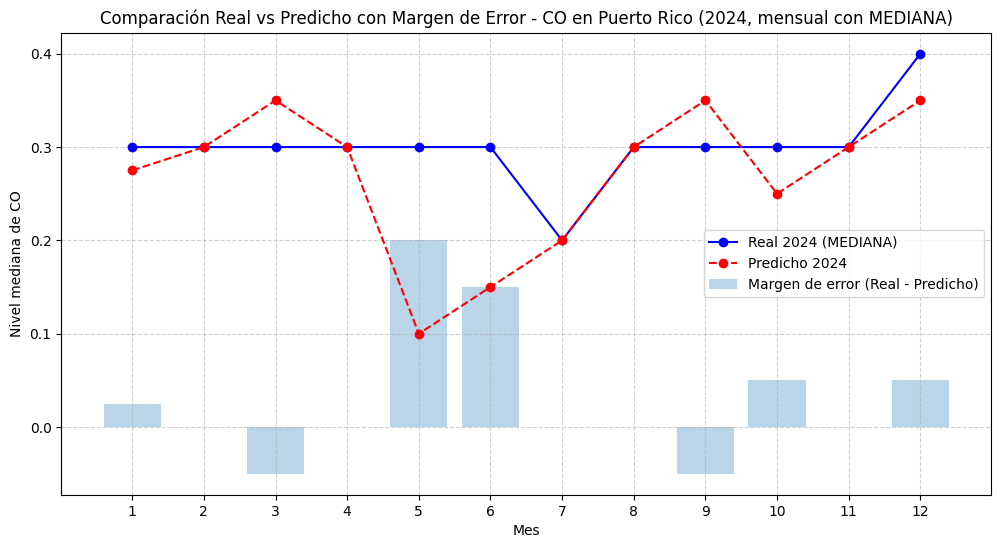

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =====================
# 9. Calcular métricas de error (MEDIANA)
# =====================
mae = mean_absolute_error(comp_2024["Real_CO"], comp_2024["Pred_CO"])
rmse = np.sqrt(mean_squared_error(comp_2024["Real_CO"], comp_2024["Pred_CO"]))
r2 = r2_score(comp_2024["Real_CO"], comp_2024["Pred_CO"])

print("\n📊 Métricas de error (2024, mensual con MEDIANA):")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# =====================
# 10. Visualización con margen de error (MEDIANA)
# =====================
plt.figure(figsize=(12,6))

# Línea real y predicha
plt.plot(comp_2024["Month"], comp_2024["Real_CO"], "bo-", label="Real 2024 (MEDIANA)")
plt.plot(comp_2024["Month"], comp_2024["Pred_CO"], "ro--", label="Predicho 2024")

# Barras de error (diferencia entre real y predicho)
error = comp_2024["Real_CO"] - comp_2024["Pred_CO"]
plt.bar(comp_2024["Month"], error, alpha=0.3, label="Margen de error (Real - Predicho)")

plt.xticks(np.arange(1,13))
plt.xlabel("Mes")
plt.ylabel("Nivel mediana de CO")
plt.title("Comparación Real vs Predicho con Margen de Error - CO en Puerto Rico (2024, mensual con MEDIANA)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



Comparación semanal 2024 (MEDIANA):
   Week  Real_CO  Year  Pred_CO
0     1      0.3  2024     0.25
1     2      0.2  2024     0.25
2     3      0.3  2024     0.35
3     4      0.2  2024     0.40
4     5      0.3  2024     0.35


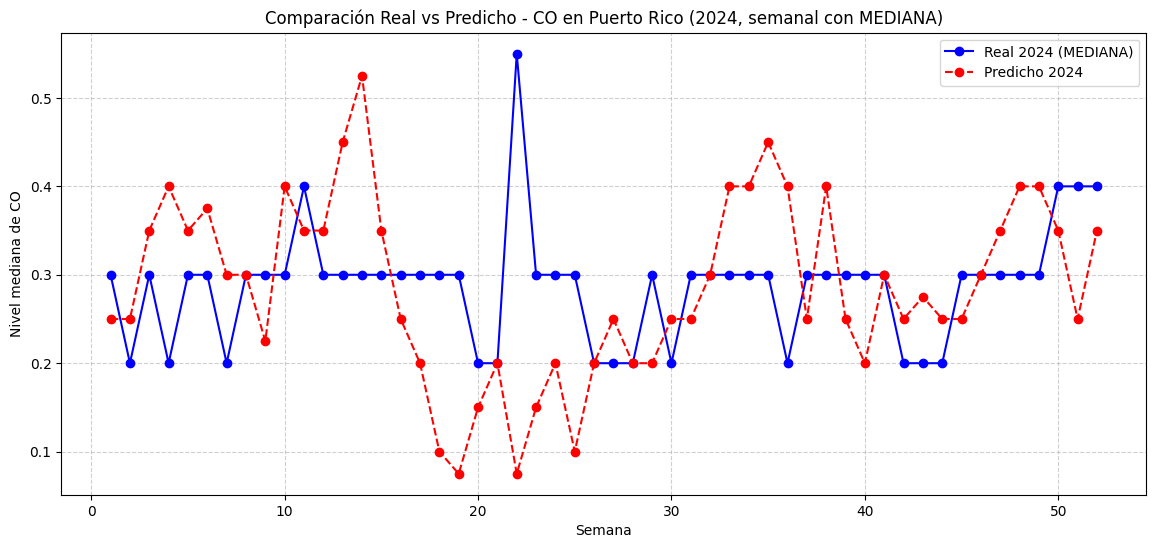

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# =====================
# 1. Cargar datasets
# =====================
df_2022 = pd.read_csv("2022.csv")
df_2023 = pd.read_csv("2023.csv")
df_2024 = pd.read_csv("2024.csv")

# Agregar columna Year
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# =====================
# 2. Unir datos de entrenamiento
# =====================
df_total = pd.concat([df_2022, df_2023], ignore_index=True)

# Filtrar Puerto Rico
df_pr = df_total[df_total["State"] == "Puerto Rico"].copy()
df_2024_pr = df_2024[df_2024["State"] == "Puerto Rico"].copy()

# =====================
# 3. Procesar fechas
# =====================
df_pr["Date"] = pd.to_datetime(df_pr["Date"])
df_pr["Week"] = df_pr["Date"].dt.isocalendar().week.astype(int)

df_2024_pr["Date"] = pd.to_datetime(df_2024_pr["Date"])
df_2024_pr["Week"] = df_2024_pr["Date"].dt.isocalendar().week.astype(int)

# =====================
# 4. Calcular MEDIANA semanal de 2022-2023
# =====================
weekly_median = (
    df_pr.groupby(["Year", "Week"])["Daily Max 8-hour CO Concentration"]
    .median()
    .reset_index()
)

# Crear variables dummy para año y semana
weekly_median = pd.get_dummies(weekly_median, columns=["Year", "Week"], prefix=["Year", "Week"])

# Definir X e y
X = weekly_median.drop(columns=["Daily Max 8-hour CO Concentration"])
y = weekly_median["Daily Max 8-hour CO Concentration"]

# =====================
# 5. Entrenar modelo
# =====================
model = LinearRegression()
model.fit(X, y)

# =====================
# 6. Dataset dummy para predicciones 2024 (52 semanas típicas)
# =====================
weeks_2024 = pd.DataFrame({
    "Year_2022": [0]*52,
    "Year_2023": [0]*52,
})

# Crear variables dummy para cada semana
for w in range(1, 53):
    weeks_2024[f"Week_{w}"] = [1 if i == w-1 else 0 for i in range(52)]

# Alinear columnas con entrenamiento
weeks_2024 = weeks_2024.reindex(columns=X.columns, fill_value=0)

# Predicciones para 2024
pred_2024 = model.predict(weeks_2024)

# =====================
# 7. Dataset real 2024 (MEDIANA semanal)
# =====================
real_2024 = (
    df_2024_pr.groupby("Week")["Daily Max 8-hour CO Concentration"]
    .median()
    .reset_index()
)
real_2024["Year"] = 2024
real_2024.rename(columns={"Daily Max 8-hour CO Concentration": "Real_CO"}, inplace=True)

# Unir con predicciones
comp_2024_weekly = real_2024.copy()
comp_2024_weekly["Pred_CO"] = pred_2024[:len(real_2024)]

print("\nComparación semanal 2024 (MEDIANA):")
print(comp_2024_weekly.head())

# =====================
# 8. Visualización
# =====================
plt.figure(figsize=(14,6))
plt.plot(comp_2024_weekly["Week"], comp_2024_weekly["Real_CO"], "bo-", label="Real 2024 (MEDIANA)")
plt.plot(comp_2024_weekly["Week"], comp_2024_weekly["Pred_CO"], "ro--", label="Predicho 2024")
plt.xlabel("Semana")
plt.ylabel("Nivel mediana de CO")
plt.title("Comparación Real vs Predicho - CO en Puerto Rico (2024, semanal con MEDIANA)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



📊 Métricas de error (2024, semanal con MEDIANA):
Error Absoluto Medio (MAE): 0.0894
Raíz del Error Cuadrático Medio (RMSE): 0.1204
Coeficiente de Determinación (R²): -2.3593


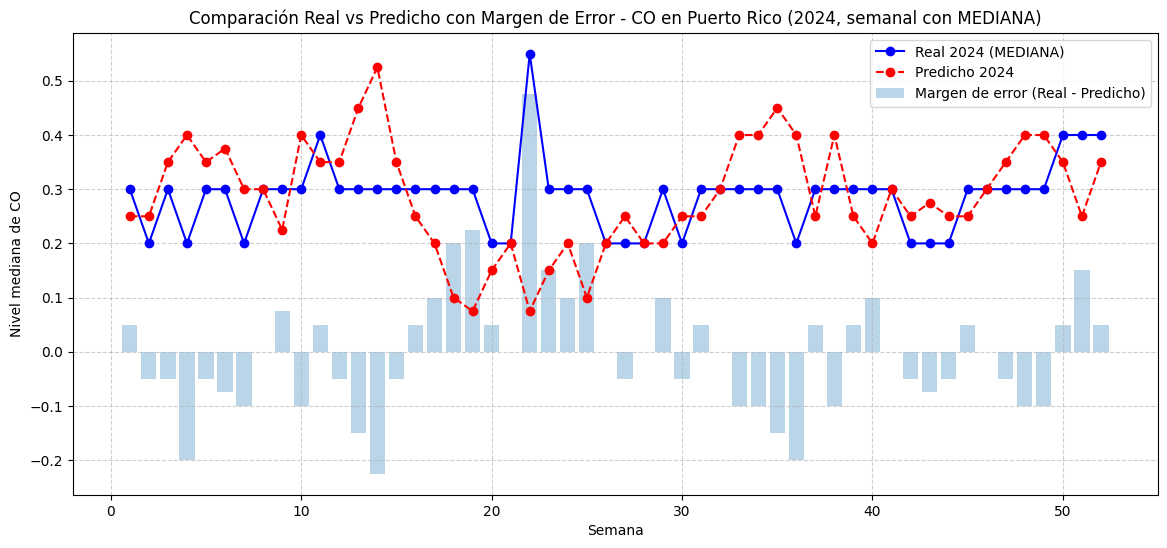

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# =====================
# 1. Calcular métricas (MEDIANA)
# =====================
mae = mean_absolute_error(comp_2024_weekly["Real_CO"], comp_2024_weekly["Pred_CO"])
rmse = np.sqrt(mean_squared_error(comp_2024_weekly["Real_CO"], comp_2024_weekly["Pred_CO"]))
r2 = r2_score(comp_2024_weekly["Real_CO"], comp_2024_weekly["Pred_CO"])

print("\n📊 Métricas de error (2024, semanal con MEDIANA):")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# =====================
# 2. Visualización con margen de error (MEDIANA)
# =====================
plt.figure(figsize=(14,6))
plt.plot(comp_2024_weekly["Week"], comp_2024_weekly["Real_CO"], "bo-", label="Real 2024 (MEDIANA)")
plt.plot(comp_2024_weekly["Week"], comp_2024_weekly["Pred_CO"], "ro--", label="Predicho 2024")

# Dibujar la diferencia (margen de error) como barras verticales
error = comp_2024_weekly["Real_CO"] - comp_2024_weekly["Pred_CO"]
plt.bar(comp_2024_weekly["Week"], error, alpha=0.3, label="Margen de error (Real - Predicho)")

plt.xlabel("Semana")
plt.ylabel("Nivel mediana de CO")
plt.title("Comparación Real vs Predicho con Margen de Error - CO en Puerto Rico (2024, semanal con MEDIANA)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
